In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data_dir = "."
normal_dir = os.path.join(data_dir, "Normal")
adenocarcinoma = os.path.join(data_dir, "Adenocarcinoma")
large_cell_carcinoma = os.path.join(data_dir, "Large cell carcinoma")
squamous_cell_carcinoma = os.path.join(data_dir, "Squamous Cell Carcinoma")

In [3]:
IMG_SIZE = 128

data = []
labels = []

def load_images(folder, label):
    for file in os.listdir(folder):
        img_path = os.path.join(folder, file)
        try:
            img = cv2.imread(img_path)
            img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            
            data.append(img_resized)
            labels.append(label)
        except Exception as err:
            print(f"Error loading image {img_path}: {err}")
            
load_images(normal_dir, 0)
load_images(adenocarcinoma, 1)
load_images(large_cell_carcinoma, 2)
load_images(squamous_cell_carcinoma, 3)

data = np.array(data) / 255
labels = np.array(labels)

print(f"Data shape: {data.shape}")
print(f"Labels shape: {labels.shape}")

Data shape: (982, 128, 128, 3)
Labels shape: (982,)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42, stratify=labels
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (785, 128, 128, 3)
X_test shape: (197, 128, 128, 3)


In [5]:
num_classes = 4

model = models.Sequential([
    # First convolutional block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),
    
    # Second convolutional block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Third convolutional block
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Flatten the results to feed into a dense layer
    layers.Flatten(),
    
    # A fully connected layer
    layers.Dense(128, activation='relu'),

    # Output layer for multi-class classification
    layers.Dense(num_classes, activation='softmax')
])

# Print the model summary to see the architecture
model.summary()

/Users/ron/Desktop/Cancer Detection Project - 1/Kidney Cancer/kidney_venv/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=30,
    validation_data=(X_test, y_test)
)

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 296ms/step - accuracy: 0.4166 - loss: 1.2031 - val_accuracy: 0.6041 - val_loss: 0.9817
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 288ms/step - accuracy: 0.6548 - loss: 0.8140 - val_accuracy: 0.7563 - val_loss: 0.6746
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 279ms/step - accuracy: 0.7860 - loss: 0.5343 - val_accuracy: 0.7970 - val_loss: 0.5836
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 273ms/step - accuracy: 0.8752 - loss: 0.3456 - val_accuracy: 0.7970 - val_loss: 0.5989
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 328ms/step - accuracy: 0.8968 - loss: 0.2614 - val_accuracy: 0.8376 - val_loss: 0.5022
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 322ms/step - accuracy: 0.9401 - loss: 0.1750 - val_accuracy: 0.9036 - val_loss: 0.4329
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 316ms/step - accuracy: 0.9643 - loss: 0.1213 - val_accuracy: 0.8782 - val_loss: 0.4902
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 307ms/step - accuracy: 0.9796 - loss: 0.0917 - val_accuracy: 0.

In [8]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test) 
print(f"Test Accuracy: {accuracy * 100:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9036 - loss: 0.5123
Test Accuracy: 90.36%


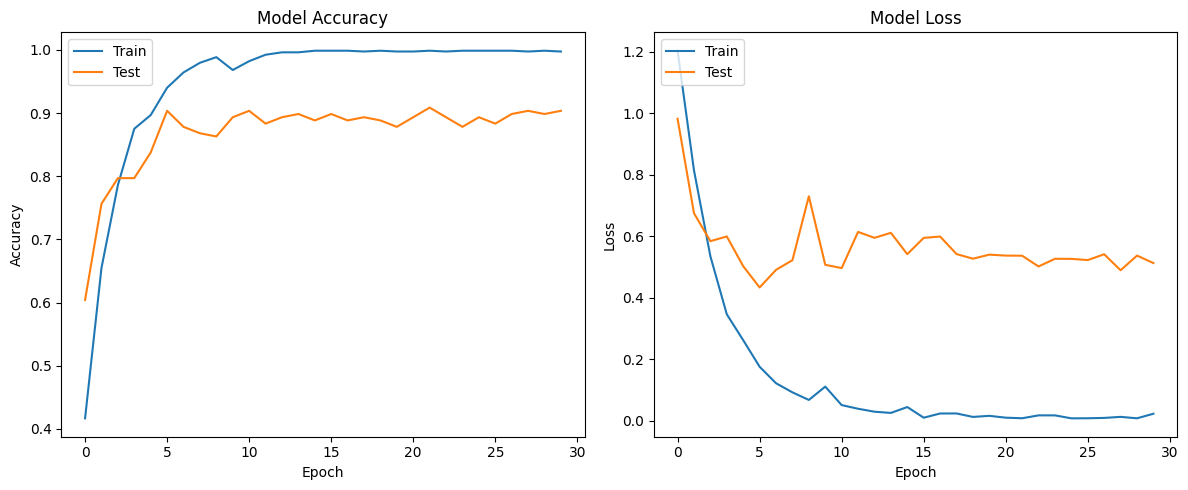

In [9]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step


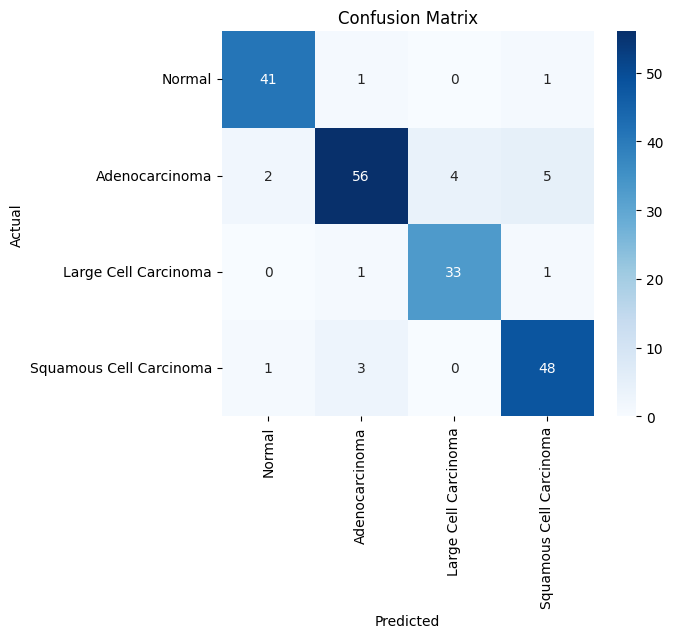


Classification Report:

                         precision    recall  f1-score   support

                 Normal       0.93      0.95      0.94        43
         Adenocarcinoma       0.92      0.84      0.88        67
   Large Cell Carcinoma       0.89      0.94      0.92        35
Squamous Cell Carcinoma       0.87      0.92      0.90        52

               accuracy                           0.90       197
              macro avg       0.90      0.91      0.91       197
           weighted avg       0.90      0.90      0.90       197



In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Adenocarcinoma', 'Large Cell Carcinoma', 'Squamous Cell Carcinoma'], 
            yticklabels=['Normal', 'Adenocarcinoma', 'Large Cell Carcinoma', 'Squamous Cell Carcinoma'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print a detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Normal', 'Adenocarcinoma', 'Large Cell Carcinoma', 'Squamous Cell Carcinoma']))

In [11]:
model.save("chest_cancer.h5")

In [12]:
from keras.models import load_model

In [13]:
model = load_model("../models/chest_cancer.h5")

In [14]:
loss, accuracy = model.evaluate(X_test, y_test) 
print(f"Test Accuracy: {accuracy * 100:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.9036 - loss: 0.5123
Test Accuracy: 90.36%
